# Telco Customer Churn
-  Telco customer churn verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve internet hizmetleri sağlayan
bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu içermektedir.

-  İş Problemi : İlgili müşteri verilerini analiz ederek müşteriyi elde tutma programları geliştirmek istenmektedir.

-  Amaç:  Makine öğrenmesi modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmek.



21 Değişken 7043 Gözlem

- Her satır benzersiz bir müşteriyi temsil etmekte.
- Değişkenler müşteri hizmetleri, hesap ve demografik veriler hakkında bilgiler içerir.
- Müşterilerin kaydolduğu hizmetler - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Müşteri hesap bilgileri – ne kadar süredir müşteri oldukları, sözleşme, ödeme yöntemi, kağıtsız faturalandırma, aylık ücretler ve toplam ücretler
- Müşteriler hakkında demografik bilgiler - cinsiyet, yaş aralığı, partnerlerinin olup olmadığı ve bakmakla yükümlü oldukları kişiler olup olmadığı


# Değişkenler

- CustomerId : Müşteri İd’si
- Gender : Cinsiyet
- SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
- Partner : Müşterinin bir partneri olup olmadığı (Evet, Hayır) ?
- Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
- tenure : Müşterinin şirkette kaldığı ay sayısı
- PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
- MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
- InternetService : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
- OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
- OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
- DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
- TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
- StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için İnternet hizmetini kullanıp kullanmadığını gösterir
- StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için İnternet hizmetini kullanıp kullanmadığını gösterir
- Contract : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
- PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
- PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
- MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
- TotalCharges : Müşteriden tahsil edilen toplam tutar
- Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır) - Geçen ay veya çeyreklik içerisinde ayrılan müşteriler

# Gerekli Kütüphane ve Fonksiyonların import edilmesi

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


# Veri setinin yüklenmesi, veri setini tanıma, veriye ilk bakış ve ilk düzenlemeler

In [10]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.shape

(7043, 21)

7043 gözlem (satır), 21 değişken (sütun) bulunuyor.

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


-  SeniorCitizen,  tenure,  MonthlyCharges değişkenleri sayısal, diğer değişkenler kategorik değişken olarak görünüyor.

-  Fakat veri setinin ilk 5 satırını incelerken de gördüğümüz gibi TotalCharges değişkeni de aslında sayısal bir değişken ama veri tipi object görünüyor.

  TotalCharges değişkenini sayısal değişkene çevirmeliyiz :

In [13]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"] , errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn değişkeni ise yani müşterinin hizmeti terk edip etmediğini gösteren değişkenimiz, Yes:Terk edenler, No: Terk etmeyenler olarak belirtilmiş.
Matematiksel işlemlerin yapılabilmesi için bu değişkeni Yes:1, No:0 olarak değiştiriyoruz.

In [14]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

Veri setine tekrar head fonksiyonu ile baktığımızda Churn değişkeninn artık 1 ve 0'lardan oluştuğunu görebiliriz :

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


Tekrar infosuna bakalım:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Artık tüm değişkenlerimiz olmasını istediğimiz veri tipinde görünüyor...

# Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)

Genel resme aşağıdaki fonksiyon ile bakabiliriz:

Veri setinin boyutunu, veri tiplerini, ilk 5 ve son 5 gözlem değerlerini, boş değer olup olmadığını ve sayısal değişkenler için tanımlayıcı istatistiklere bakabiliriz :

In [17]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)


##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0  7590-VHVEG  Female              0     Yes         No       1    

Yukarıdaki çıktıya göre;

* TotalCharges değişkeninde 11 adet eksik değer var.
  
Tanımlayıcı istatistiklere bakarsak:
  (Bu istatistikler sadece sayısal değişkenler için gelir, SeniorCitizen ve Churn değişkenleri aslında kategorik değişkenler fakat matematiksel işlemler için 1 ve 0'lardan oluşması gerektiği için burada görünüyorlar.)

* tenure (müşterinin hizmette kalma süresi) ortalama 32 ay, minimum 24,5 ay, maximum 72 ay.

* MonthlyCharges (aylık ödeme) ortalama 65 usd, min 18, max 119 usd.

* TotalCharges (toplam ödeme) ortalama 2283 usd, min 18, max 8685 usd.

  Standart sapma ve yüzdelik dilimlerdeki değerleri de burada inceleyebiliyoruz.



# NÜMERİK VE KATEGORİK DEĞİŞKENLERİN YAKALANMASI

Aşağıdaki fonksiyon veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir. Yani , örneğin Churn değişkeni 0 ve 1 lerden oluşuyor ama aslında kategorik bir değişken ve bu fonksiyonla bu durumu yakalayabiliyoruz.

Fonksiyondaki cat_th ve car_th değerlerini kendimiz belirledik.

-  cat_th=10 : nümerik görünümlü kategorik değşikenler için sınıf eşik değeri. (nümerik olarak görünen değişkenlerin benzersiz sınıf sayısı belirlediğimiz threshold olan 10'dan küçükse kategorik listesine almak istiyoruz)

-  car_th=20 : kategorik fakat kardinal değişkenler için sınıf eşik değeri.(kategorik olarak görünen değişkenlerin benzersiz sınıf sayısı 20'den büyükse kardinal olarak al)

Kategorik değişkenler, nümerik değişkenler, kategorik görünümlü kardinal değişkenleri tespit edeceğiz :

In [27]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


Yukarıdaki fonksiyonla toplam gözlem ve değişken sayısını (7043, 21),

gerçekte kategorik olan değişkenlerin sayısını (17),

nümerik değişkenlerin sayısını (3),

kardinal değişken sayısını (1),

nümerik görünümlü kategorik değişken sayısını (2)

tespit ettik.

Bu değişkenlerin isimlerine bakalım:

In [28]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']

In [29]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [30]:
cat_but_car

['customerID']

Yukarıda bütün değişkenleri gerçek tiplerine göre doğru bir şekilde yakalayabildiğimizi görüyoruz...

# KATEGORİK DEĞİŞKENLERİN ANALİZİ

Aşağıdaki fonksiyonla dataframe ve sütun ismi vererek ilgili değişkenin frekansını ve bu değişkenin dataframe içindeki yüzdesini görmek istiyoruz.

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##########################################


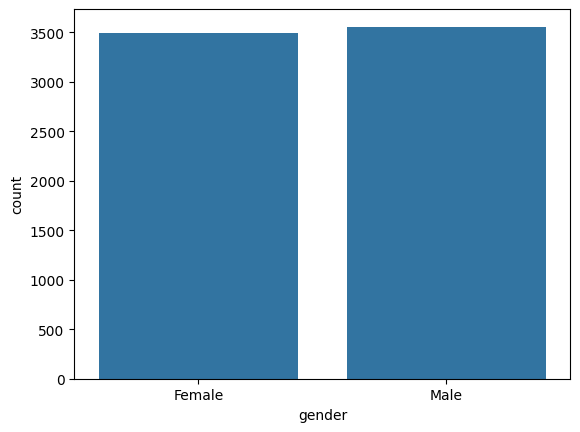

         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
##########################################


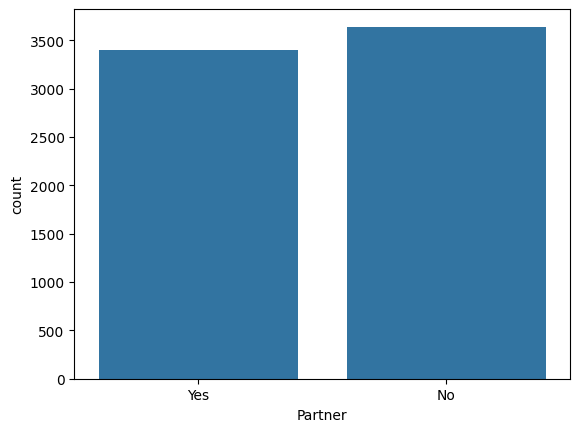

            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
##########################################


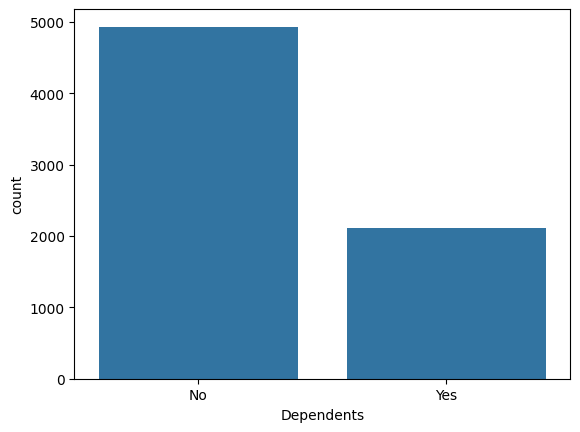

              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
##########################################


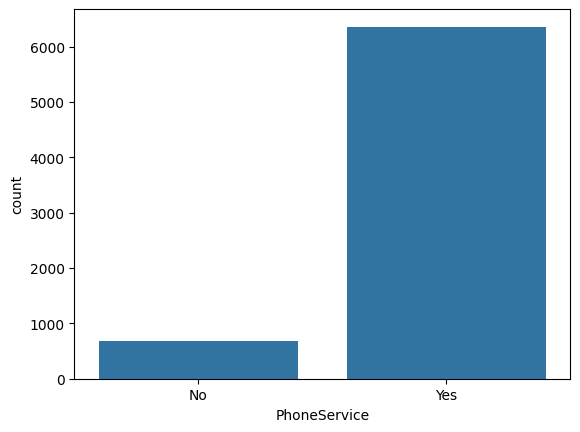

                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


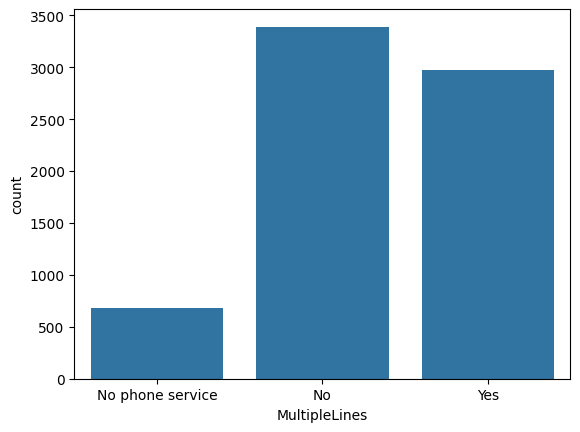

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
##########################################


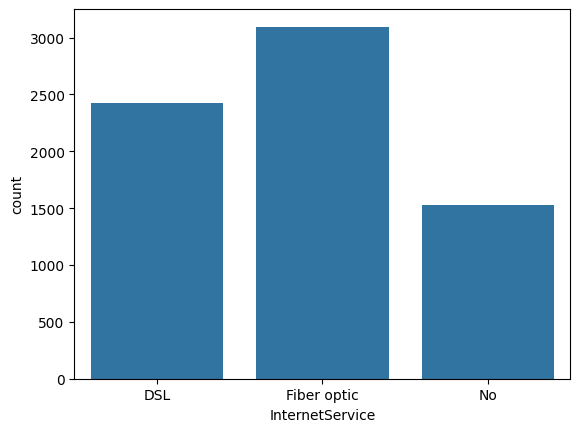

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


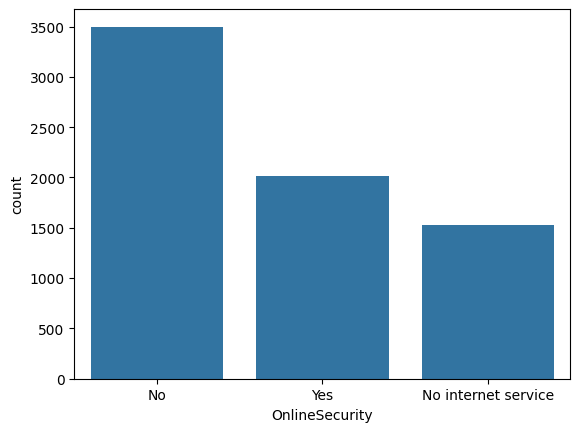

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


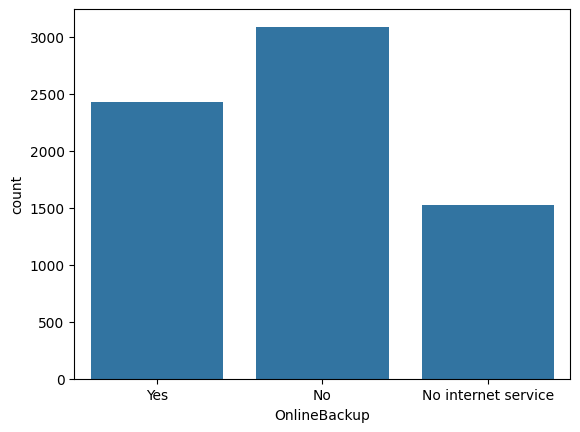

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


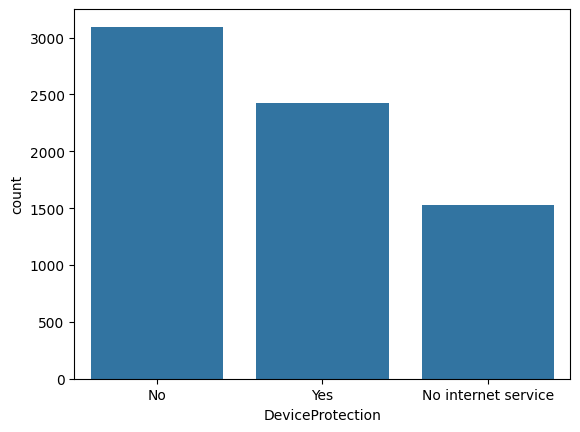

                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


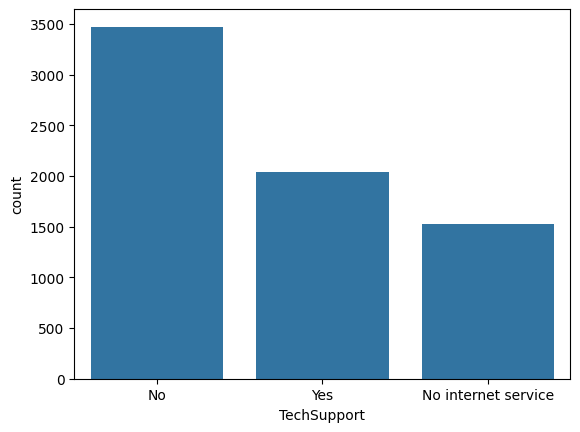

                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


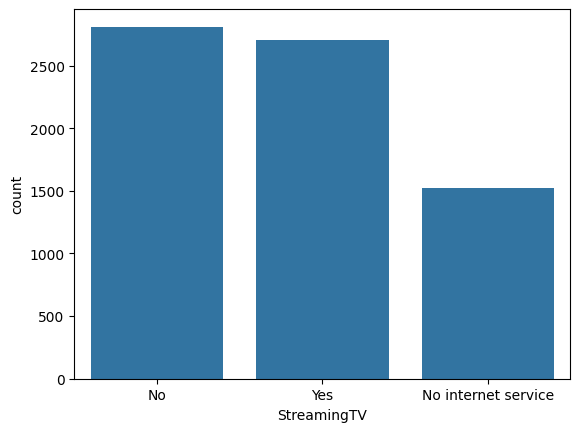

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


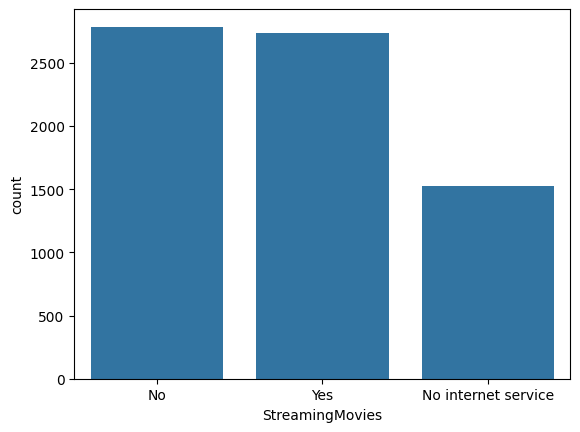

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


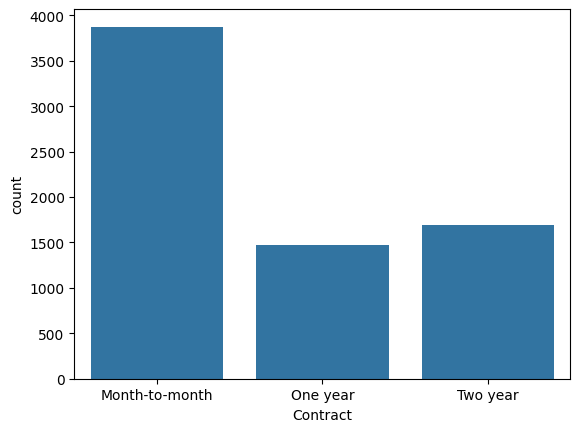

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778
##########################################


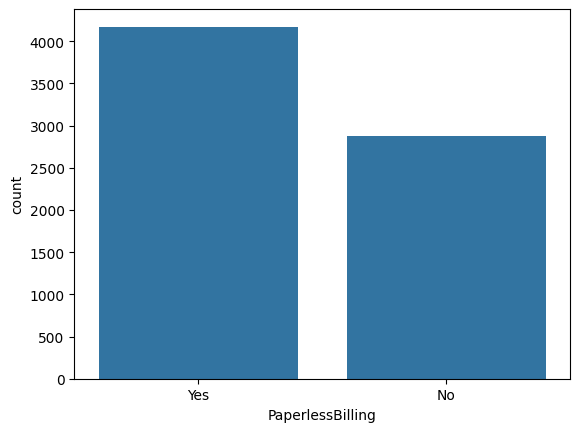

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


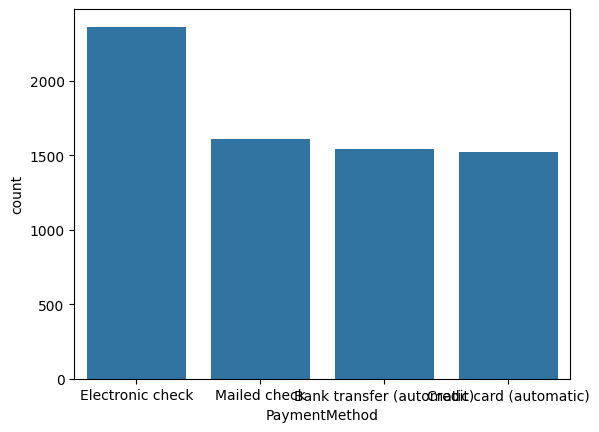

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
##########################################


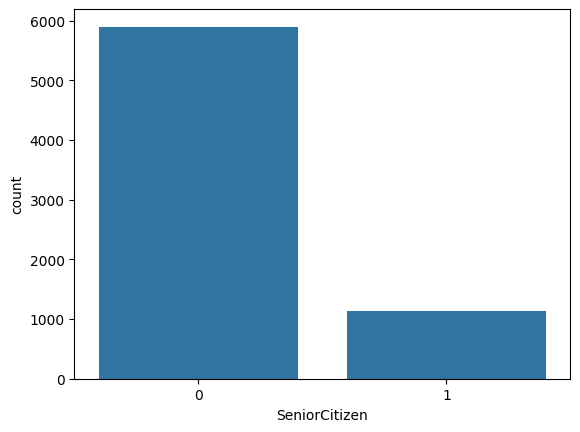

       Churn  Ratio
Churn              
0       5174 73.463
1       1869 26.537
##########################################


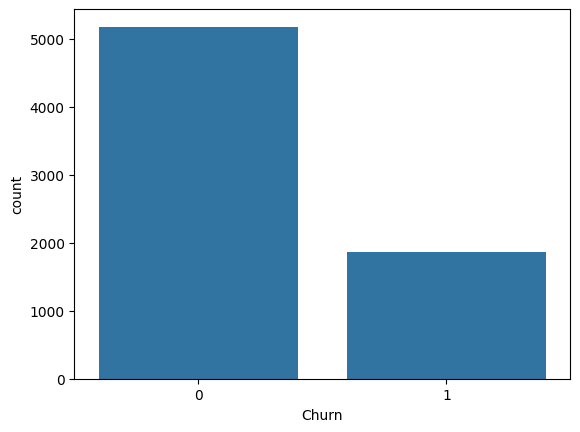

In [32]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col, plot=True)

Yukarıda her bir kolonun frekansını ve veri seti içindeki oranlarını hem sayısal hem grafik olarak görebiliriz.

* Örneğin Erkekler : 3555  kişi ve veri setinin %50.5'ini, Kadınlar 3488 kişi ve veri setinin % 49.5'unun oluşturuyor. Cinsiyet açısından dengeli bir dağılım var diyebiliriz.

* SeniorCitizen'e bakarsak veri setinin %16'sını oluşturduğunu görüyoruz. Veri setinin büyük çoğunluğunu gençler oluşturuyor diyebiliriz...

* Churn olanlar % 26.5, Churn olmayanlar % 73.5 olarak görünüyor.

Değişkenlerin hepsini yukarıdaki gibi inceleyebiliyoruz.

# NUMERİK DEĞİŞKENLERİN ANALİZİ

Verdiğimiz dataframe ve ilgili kolonu yazdığımızda, verdiğimiz quantiles değerlerine göre  ilgili nümerik değişkenlerin değerlerini vermesini istiyoruz. Aynı zamanda dağılıma da bakmak için quantiles değerlerini verdik:

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


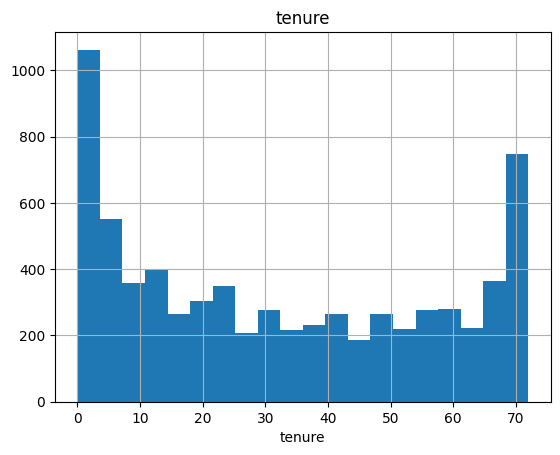

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


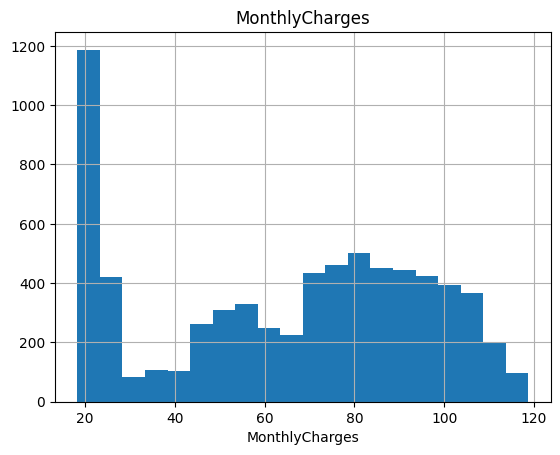

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


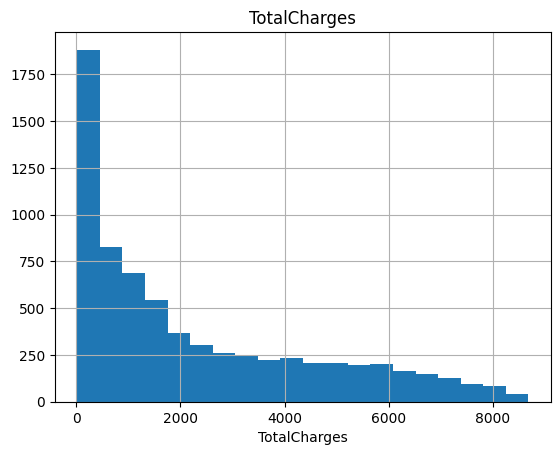

In [33]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

- tenure (müşterinin firmada kaç ay kaldığı) 0-2.5 ay arasında kalanlar (1000'den fazla kişi) ve 70 ay civarında kalanlar (800'e yakın kişi) dağılımın yüksek noktaları.

- MontlyCharges (aylık ücret) 20-25 usd arası en çok kişinin olduğu alan.

- TotalCharges'da (toplam ücret) en fazla kişi sayısı (1750'den fazla) 0-250 usd arasında ödeme yapanlara dağılmış diyebiliriz.

* Toplam ücret artarken kişi sayısı azalarak gidiyor.

# NUMERİK DEĞİŞKENLERİN HEDEF DEĞİŞKENE GÖRE ANALİZİ

Aşağıdaki fonksiyonla, veri setimizi hedef değişkene göre gruplayarak ilgili nümerik kolonların ortalamasını almak istiyoruz.

In [34]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




Hedef değişkenimiz Churn, yani müşterinin hizmeti terk edip etmeme durumu. Buna göre ortalamalara baktığımızda :

Churn olanların ortalamaları;
*   Hizmette kalma 17 ay
*   Aylık ödeme 74 usd
*   Toplam ödeme 1531 usd

Churn olmayanların ortalamaları;
* Hizmette kalma 37 ay
* Aylık ödeme 61 usd
* Toplam ödeme 2555 usd


**Churn olmayanların aylık ortalama fatura tutarlarının daha düşük olduğunu görebiliriz.**

Churn olmayanların toplam ödeme tutarının Churn olanlara göre daha yüksek olması ise beklenen doğal bir durum.

# KATEGORİK DEĞİŞKENLERİN HEDEF DEĞİŞKENE GÖRE ANALİZİ

Aşağıdaki fonksiyonla kategorik değişkenler bazında Churn olma ortalamalarına (TARGET_MEAN) ve kategorik değişkenlerin veri seti içindeki dağılımlarına bakmak istiyoruz (Count ve Ratio).

In [35]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

gender
        TARGET_MEAN  Count  Ratio
gender                           
Female        0.269   3488 49.524
Male          0.262   3555 50.476


Partner
         TARGET_MEAN  Count  Ratio
Partner                           
No             0.330   3641 51.697
Yes            0.197   3402 48.303


Dependents
            TARGET_MEAN  Count  Ratio
Dependents                           
No                0.313   4933 70.041
Yes               0.155   2110 29.959


PhoneService
              TARGET_MEAN  Count  Ratio
PhoneService                           
No                  0.249    682  9.683
Yes                 0.267   6361 90.317


MultipleLines
                  TARGET_MEAN  Count  Ratio
MultipleLines                              
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


InternetService
                 TARGET_MEAN  Count  Ratio
InternetService                           
DSL                    0.19

Yukarıdaki sonuçları incelersek;
* Kadınlar, veri setimizin % 49.5'ini (3488 kişi), Erkekler % 50.5'ini (3555 kişi) oluşturuyor. Kadınların % 26.9'u , Erkeklerin % 26.2'sinin Churn olduğunu görüyoruz.

* Partneri olmayanlar veri setinin % 51'i (3641 kişi) ve bu kişilerin %33'ü Churn olmuş. Partneri olanlar veri setinin %48'i (3402 kişi) ve %19.7'si Churn olmuş.

**Partneri olmayanların daha fazla Churn olduğunu görebiliyoruz.**

Bütün kategorik değişkenlerin veri seti içindeki dağılımlarına ve Churn oranlarına yukarıdaki şekilde bakabiliriz.

# KORELASYON

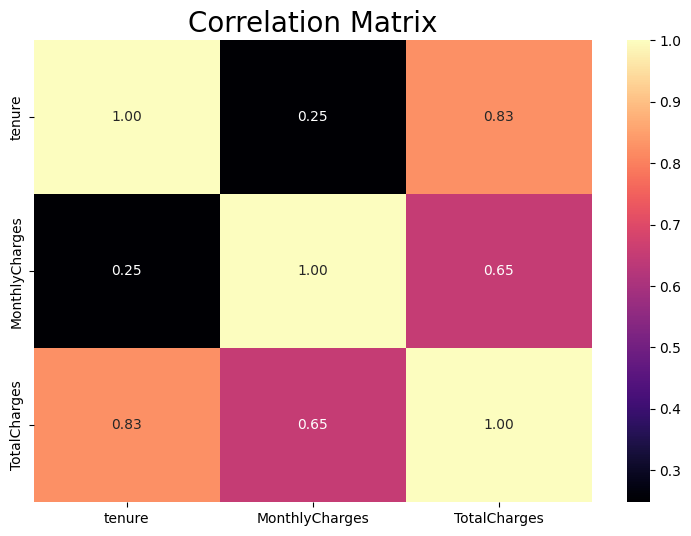

In [36]:
df[num_cols].corr()

# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[9, 6])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Yukarıdaki Isı Haritası'ndaki değerlerde 1'e yakınlık(sarı renk) yüksek korelasyonu, 0'a yakınlık (siyah renk) düşük korelasyonu gösteriyor.

(Genellikle %90 ve üzeri korelasyon çok yüksek korelasyon olarak adlandırılır.)

Yukarıdaki grafiği incelersek;

* TotalCharges'in aylık ücretler ve tenure ile yüksek korelasyonlu olduğu görülmekte...

* tenure ile MontlyCharge arasında % 25, TotalCharges arasında %83 korelasyon var. Bu beklenen bir durum çünkü müşterinin hizmette kaldığı süre artııkça doğal olarak toplam ödediği ücret de artacaktır. İkisi arasında pozitif korelasyon olması doğaldır.

* TotalCharges ile MontlyCharges arasında %65'lik pozitif korelasyon var - bu da beklenen bir durumdur.

Churn ile en yüksek korelasyonlu nümerik değişkenlere bakalım :

In [37]:
df[num_cols].corrwith(df["Churn"]).sort_values(ascending=False)

MonthlyCharges    0.193
TotalCharges     -0.199
tenure           -0.352
dtype: float64

* Aylık ödeme arttıkça Churn artıyor (pozitif korelasyon) ama %19'luk korelasyon çok yüksek sayılmaz.
* Toplam ödeme arttıkça Churn düşüyor (negatif korelasyon) bu da %19,9 :yüsek korelasyon değil
* Müşterinin hizmette kaldığı süre arttıkça Churn düşüyor (negatif korelasyon) %35 : çok yüksek değil


# ÖZELLİK MÜHENDİSLİĞİ (FEATURE ENGINEERING)

# EKSİK DEĞER ANALİZİ

In [38]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges değişkeninde 11 adet eksik değer vardı.

In [39]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11  0.160


- Yukarıdaki çıktıda görüyoruz ki, TotalCharges değişkeninin 11 adet eksik değeri var ve bu eksik değerler data setinin % 16'sını oluşturuyor.

Eksik değerleri TotalCharges'ın medyanıyla doldurabiliriz:

In [40]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# AYKIRI DEĞER ANALİZİ

Baskılama Yöntemiyle aykırı değerleri baskılayacağız.

Aykırı değerleri baskılamak için IQR yöntemiyle alt ve üst limitleri belirleyeceğiz:

In [41]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

Aykırı değer olup olmadığını kontrol edeceğiz:

In [42]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

Yukarıdaki fonksiyonla, aykırı değer varsa ve alt limitin altındaysa veya üst limitin üstündeyse bize bunları True olarak döndürmesini istiyoruz.

Tüm kolonlara check_outlier fonksiyonunu uyguluyoruz :

In [43]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


- Yukarıda değerlerimiz False döndüğü için aykırı değer olmadığını görebiliyoruz.

- Eğer aykırı değer olsaydı aşağıdaki şekilde baskılama yapabilirdik:

Aşağıdaki fonksiyonla, aykırı değer alt limitin altındaysa alt limitle, üst limitin üstündeyse üst limitle doldur diyoruz.

In [44]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Aşağıdaki döngüyle bütün kolonlarda gezerek aykırı değer olup olmadığını kontrol ediyoruz ve eğer aykırı değer varsa her bir aykırı değer için baskılama işlemini uyguluyoruz.

In [45]:
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

tenure False
MonthlyCharges False
TotalCharges False


# BASE MODEL KURULUMU

Model başarı metriklerine bakmak çin model kurmak istiyoruz:

In [46]:
dff = df.copy()

# Tahmin etmek istediğimiz değişken Churn olduğu için Churn'u çıkarıyoruz
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols
df[cat_cols].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


Modeller sayısal değişkenlerle çalıştığı için Yes ve No olan ifadeleri one hot encoding ile encode etmeliyiz:

In [47]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [48]:
y = dff["Churn"]  # hedef değişken (Churn)
X = dff.drop(["Churn","customerID"], axis=1)  # bağımsız değişkenler (Churn ve Customer Id' dışındakiler)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)  # verinin test ve train olarak bölünmesi

catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train) # modelin kurulması (Sınıflandırma problemi için model)
y_pred = catboost_model.predict(X_test) # tahmin

Model başarı metriklerini yazdıralım :

In [49]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

Accuracy: 0.7847
Recall: 0.6331
Precision: 0.493
F1: 0.5544
Auc: 0.7292


In [50]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [51]:
y_pred  # tahmin edilen değerler

array([0, 0, 0, ..., 0, 1, 1])

# ÖZELLİK ÇIKARIMI (FEATURE EXTRACTION)

In [52]:
# Tenure (aylık) değişkeninden yıllık kategorik değişken oluşturma
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

In [53]:
# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtme
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

In [54]:
# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [55]:
#Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

In [56]:
# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [57]:
# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [58]:
# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

In [59]:
# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)
# +1 yapmamaızın sebebi ;  tenure aylık olduğu için henüz 1 ay'ı tamamlamayan müşterilerin değeri 0 olarak geliyordu.
# Bölme işlemini yaparken hata almamamk için 0'ları 1 yapmasını istedik.

In [60]:
# yeni ortalama aylık ödemenin, gerçekteki aylık ödemeye göre oranı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

In [61]:
# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [62]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,1,0,0,14.925,0.500,14.925
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,3,0,0,53.986,0.948,14.238
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,3,0,0,36.050,0.669,13.463
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,3,0,1,40.016,0.946,10.575
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,1,0,0,50.550,0.715,35.350


In [63]:
df.shape

(7043, 31)

Yeni değişkenleri ekledikten sonra değişken sayımız 21'den 31'e çıkmış oldu.

# ENCODING

In [64]:
# Değişkenlerin tiplerine göre ayrılması işlemi
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


In [65]:
# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols


['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [66]:
for col in binary_cols:
    df = label_encoder(df, col)

In [67]:
# One-Hot Encoding İşlemi için cat_cols listesini güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment']

In [68]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [69]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

# MODELLEME

In [71]:
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.79
Recall: 0.65
Precision: 0.5
F1: 0.56
Auc: 0.74


Model başarı metriklerinde artış olduğunu görüyoruz :

In [70]:
# Base Model'deki Metrikler:
Accuracy: 0.7847
Recall: 0.6331
Precision: 0.493
F1: 0.5544
Auc: 0.7292

# Future Engineering yaptıktan sonra kurduğumuz Model'deki Metrikler:
Accuracy: 0.79
Recall: 0.65
Precision: 0.5
F1: 0.56
Auc: 0.74

# ÖZELLİK ÖNEMİ (FEATURE IMPORTANCE)

Modelin başarısına etki eden özellikleri büyükten küçüğe doğru sıralayabilir ve bir grafikle bunu görselleştirebiliriz :

    Value                                Feature
10  9.659                           NEW_Increase
11  9.069                    NEW_AVG_Service_Fee
7   8.978                           TotalCharges
3   8.942                                 tenure
6   7.916                         MonthlyCharges
9   6.689                        NEW_AVG_Charges
39  5.055                          NEW_Engaged_1
29  4.784                      Contract_Two year
5   3.809                       PaperlessBilling
14  2.759            InternetService_Fiber optic
0   2.337                                 gender
13  1.771                      MultipleLines_Yes
38  1.741                        SeniorCitizen_1
21  1.677                   DeviceProtection_Yes
2   1.587                             Dependents
8   1.538                      NEW_TotalServices
31  1.501         PaymentMethod_Electronic check
28  1.348                      Contract_One year
17  1.292                     OnlineSecurity_Yes
25  1.259           

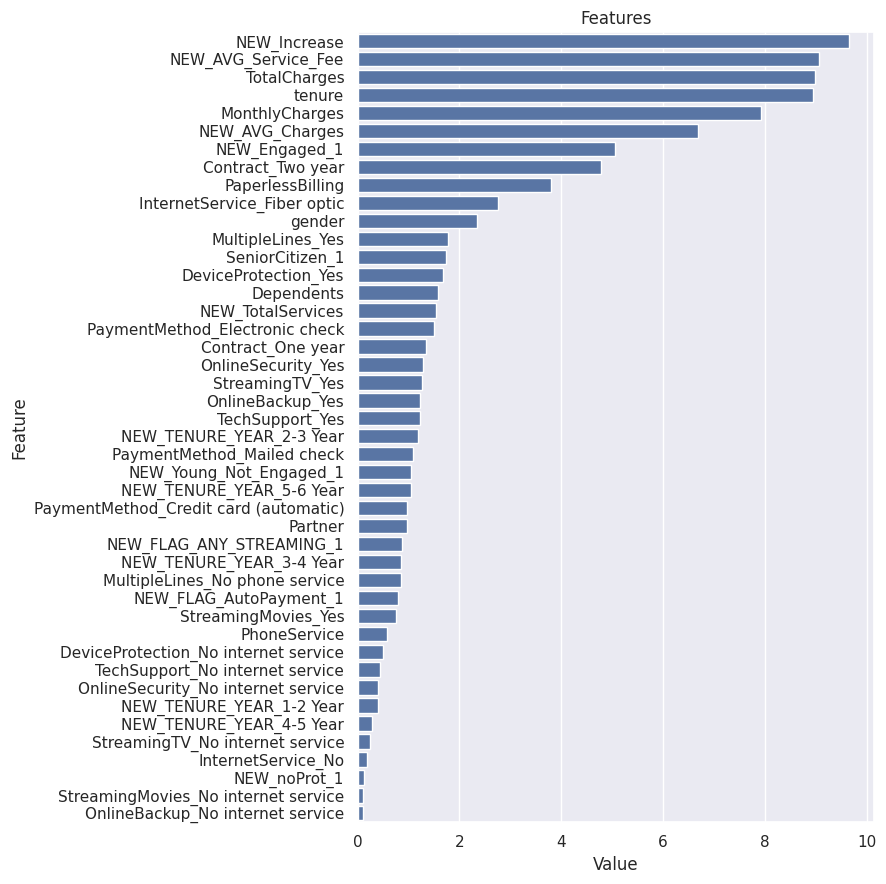

In [72]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(9, 9))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(catboost_model, X)

Yukarıdaki grafikte future engineering ile eklediğimiz yeni özelliklerden bazılarının modelimizin başarısını arttırma konusunda ilk sıralarda yer aldığını görüyoruz. Bu özellikler,
* NEW_Increase
* NEW_AVG_Service_Fee
* NEW_AVG_Charges
* NEW_Engaged_1

olarak görünüyor.

                                                  Çalışmamı incelediğiniz için teşekkürler...

                                                             Şeyda Erbay Kaya